# Bias in the determination of linear polarization.

**PURPOSE:** Illustrate the concept of bias and variance for quadratic estimators. Case of polarization intensity.

**Notation:** variables with index 0 correspond to true values (P0).

*@author: jalberto*

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [38]:
# WK estimator
def p_wk(P, sigma):
    arg = P**2 - sigma**2
    Pwk = np.zeros(len(P))
    cut = arg>0
    Pwk[cut] = np.sqrt(arg[cut])
    #Pwk = np.where(arg>0, np.sqrt(arg), 0)
    return Pwk

# MAS estimator
def p_mas(P, sigma):
    sigchi = sigma/(2*P) 
    Pmas   = P * ( 1 - 2*sigchi**2 * (1-np.exp(-P**2/sigma**2)))
    return Pmas

*FIRST example:* simulating a measurement in which the intrisic polarization is zero.

In [39]:
nsim = 50000
    
# CASE 1. Intrinsic polarization is zero Q0=U0=0
Q0    = 0.0
U0    = 0.0
P0    = np.sqrt(Q0**2 + U0**2)
sigma = 1.0  # error in Q or U measuremnt.

# Simulating Measurements
n = nsim # number of measurements.    
Q = Q0 + np.random.randn(n)*sigma
U = U0 + np.random.randn(n)*sigma

# Measured value of P (classical method, biased):
P = np.sqrt(Q**2 + U**2)
errP = sigma

# Compute some statistics:
print("CASE 1. Intrinsic P0 = ",P0)
print("> Mean value of Q = ",np.mean(Q))
print("> Standard deviation of Q   = ",np.std(Q))
print("> Mean value of U = ",np.mean(U))
print("> Standard deviation of U   = ",np.std(U))
    
print("> Mean value of P = ",np.mean(P))
print("> Standard deviation of P   = ",np.std(P))

print('Biased-corrected estimators:')
PWK  = p_wk(P,sigma)
print("> Mean value of PWK = ",np.mean(PWK))
Pmas = p_mas(P,sigma)
print("> Mean value of Pmas= ",np.mean(Pmas))
print("----------")

CASE 1. Intrinsic P0 =  0.0
> Mean value of Q =  -0.006020862578152253
> Standard deviation of Q   =  1.003251790837978
> Mean value of U =  0.0028592998924258173
> Standard deviation of U   =  0.9988345895057059
> Mean value of P =  1.2548477739619104
> Standard deviation of P   =  0.6554282444154661
Biased-corrected estimators:
> Mean value of PWK =  0.7620164815512667
> Mean value of Pmas=  0.9899797872662838
----------


The resulting P is biased. The two considered estimators partially correct for that bias.
The posterior (distribution of P values) is given by a Rice function:

(array([6.160e+02, 1.734e+03, 2.643e+03, 3.529e+03, 4.138e+03, 4.566e+03,
        4.509e+03, 4.417e+03, 4.344e+03, 3.836e+03, 3.417e+03, 2.839e+03,
        2.350e+03, 1.879e+03, 1.474e+03, 1.157e+03, 7.950e+02, 5.980e+02,
        4.030e+02, 2.820e+02, 1.790e+02, 1.130e+02, 6.600e+01, 4.400e+01,
        3.700e+01, 1.000e+01, 1.300e+01, 5.000e+00, 4.000e+00, 3.000e+00]),
 array([0.00551508, 0.15749476, 0.30947443, 0.46145411, 0.61343378,
        0.76541346, 0.91739313, 1.06937281, 1.22135248, 1.37333216,
        1.52531183, 1.6772915 , 1.82927118, 1.98125085, 2.13323053,
        2.2852102 , 2.43718988, 2.58916955, 2.74114923, 2.8931289 ,
        3.04510858, 3.19708825, 3.34906793, 3.5010476 , 3.65302728,
        3.80500695, 3.95698663, 4.1089663 , 4.26094598, 4.41292565,
        4.56490532]),
 <BarContainer object of 30 artists>)

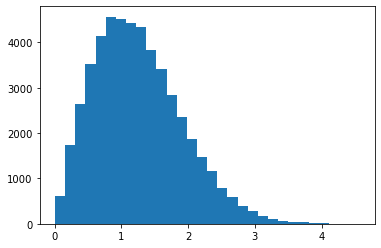

In [40]:
plt.hist(P,bins=30)

*SECOND example:* simulating a measurement in which the intrisic polarization non zero, but small compared to the typical error.

In [41]:
Q0    = 1.0
U0    = 0.0
P0    = np.sqrt(Q0**2 + U0**2)
sigma = 1.0  # error in Q or U measuremnt.
    
# simulating Measurements
n     = nsim  # number of measurements.    
Q = Q0 + np.random.randn(n)*sigma
U = U0 + np.random.randn(n)*sigma

# Measured value of P (clasical method):
P = np.sqrt(Q**2 + U**2)
errP = sigma

# Compute some statistics:
print("CASE 2. Intrinsic P0 = ",P0)
print("> Mean value of Q = ",np.mean(Q))
print("> Standard deviation of Q   = ",np.std(Q))
print("> Mean value of U = ",np.mean(U))
print("> Standard deviation of U   = ",np.std(U))
    
print("> Mean value of P = ",np.mean(P))
print("> Standard deviation of P   = ",np.std(P))

print('Biased-corrected estimators:')
PWK = p_wk(P,sigma)
print("> Mean value of PWK = ",np.mean(PWK))
Pmas = p_mas(P,sigma)
print("> Mean value of Pmas= ",np.mean(Pmas))
print("----------")

CASE 2. Intrinsic P0 =  1.0
> Mean value of Q =  0.9951174381784114
> Standard deviation of Q   =  0.9965972197095581
> Mean value of U =  0.002065814500856137
> Standard deviation of U   =  0.9978683240709671
> Mean value of P =  1.5439085397674353
> Standard deviation of P   =  0.7717231464110199
Biased-corrected estimators:
> Mean value of PWK =  1.1120556966576485
> Mean value of Pmas=  1.2869015640597343
----------


*THIRD example:* simulating a measurement in which the intrisic polarization non zero, with an amplitude around 3-4 sigma levels (low signal to noise).

In [42]:
# CASE 3. Realistic case
Q0    = 3.0
U0    = 4.0
P0    = np.sqrt(Q0**2 + U0**2)
sigma = 1.0  # error in Q or U measuremnt.
    
# Measurements
n = nsim  # number of measurements.    
Q = Q0 + np.random.randn(n)*sigma
U = U0 + np.random.randn(n)*sigma
    
# Measured value of P (clasical method):
P = np.sqrt(Q**2 + U**2)
errP = sigma # quadratic.

# Compute some statistics:
print("CASE 3. Intrinsic P0 = ",P0)
print("> Mean value of Q = ",np.mean(Q))
print("> Standard deviation of Q   = ",np.std(Q))
print("> Mean value of U = ",np.mean(U))
print("> Standard deviation of U   = ",np.std(U))
    
print("> Mean value of P = ",np.mean(P))
print("> Standard deviation of P   = ",np.std(P))

print('Biased-corrected estimators:')
PWK = p_wk(P,sigma)
print("> Mean value of PWK = ",np.mean(PWK))
Pmas = p_mas(P,sigma)
print("> Mean value of Pmas= ",np.mean(Pmas))

CASE 3. Intrinsic P0 =  5.0
> Mean value of Q =  3.0026400559118227
> Standard deviation of Q   =  0.9976540948996119
> Mean value of U =  3.997288794043503
> Standard deviation of U   =  1.0030534911946145
> Mean value of P =  5.100617538161933
> Standard deviation of P   =  0.9895937232089164
Biased-corrected estimators:
> Mean value of PWK =  4.997110683907525
> Mean value of Pmas=  4.998417444190714


In this case, the bias is well corrected.